# Decision Trees and Random Forests
## Classifying Digits
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

Reference_2: https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Decision-Tree-Levels

Vamos a importar las librerias iniciales para este trabajo que pueden ser:


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.display import Image

from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
import helpers_05_08
from helpers_05_08 import visualize_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Vamos a utilizar la libreria de digitos para clasificarlos con Random Forest.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Ahora vamos a vizualizar los puntos que obtuvimos de "load_digits" de la siguiente manera:

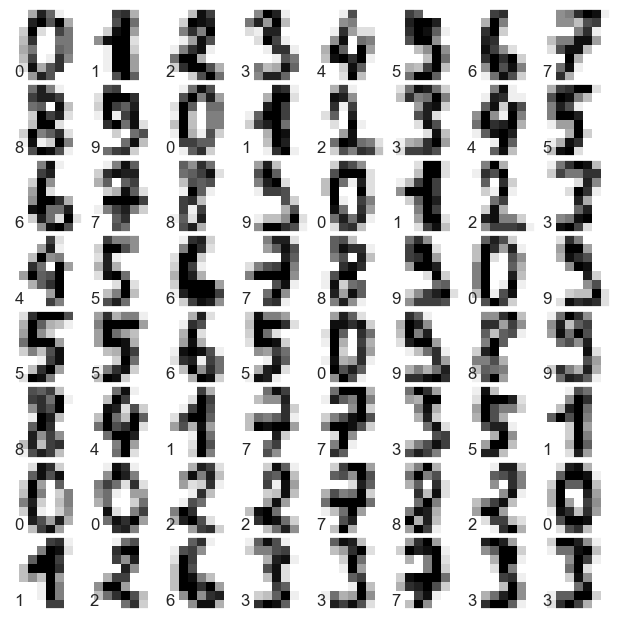

In [6]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Ahora que sabemos los digitos que tenemos, pordemos clasificarlos rapidamente usando RandomForest de la siguiente manera.

In [8]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Los resultados serian:

In [9]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Tambien podemos observarlos en la matriz de confucion, asi podemos visualizar mayormente el rango de acierto que tendra el programa en cada numero.

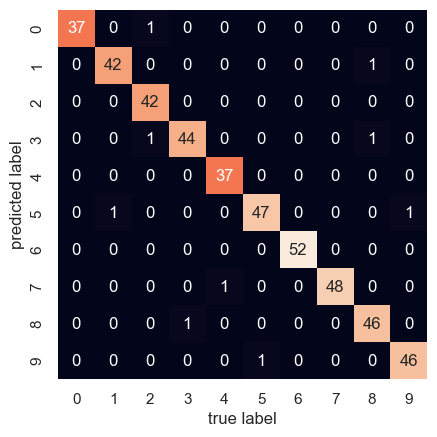

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Como podemos darnos cuenta, el uso de los arboles de desicion da como resultado un proceso de clasificacion por binarios muy rapido y muy preciso a la hora de acertar en este caso de los digitos.